In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score 
import numpy as np
from sklearn.feature_selection import SelectFromModel

In [2]:
train = pd.read_csv('dataset.csv',encoding='utf-8')
#only rows that are not null
train = train[train.Sentiment.isnull() == False]
train = train[train['SentimentText'].isnull() == False]
#convert string to int
train['Sentiment'] = train['Sentiment'].map(int)
train.head()

,SentimentText,Sentiment
0,"first think another Disney movie, might good, ...",1
1,"Put aside Dr. House repeat missed, Desperate H...",0
2,"big fan Stephen King's work, film made even gr...",1
3,watched horrid thing TV. Needless say one movi...,0
4,truly enjoyed film. acting terrific plot. Jeff...,1


In [4]:
#data preProcessing
#whitespace at the beggining
train['SentimentText'] = train['SentimentText'].str.lstrip()
#white space at the end
train['SentimentText'] = train['SentimentText'].str.rstrip()
#" at both sides
train['SentimentText'] = train['SentimentText'].str.strip()
#lowercase
train['SentimentText'] = train['SentimentText'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#digits
#train['desc'] = train['desc'].str.replace('[0,1,2,3,4,5,6,7,8,9]','')
train['SentimentText'] = train['SentimentText'].str.replace('\d+', '')
#punctuations
train['SentimentText'] = train['SentimentText'].str.replace('[^\w\s]',' ')
#replace no space
train['SentimentText'] = train['SentimentText'].str.replace('[.;:!\'?,\"()\[\]]',' ')
#replace with space
train['SentimentText'] = train['SentimentText'].str.replace('(<br\s*/><br\s*/>)|(\-)|(\/)',' ')
#html tag
train['SentimentText'] = train['SentimentText'].str.replace('<[^>]+>',' ')
#wwww
train['SentimentText'] = train['SentimentText'].str.replace('www.[^ ]+',' ')
# Fill NaN with ' '
train['SentimentText'] = train['SentimentText'].fillna(' ')
#common words 100*
freq = pd.Series(' '.join(train['SentimentText']).split()).value_counts()[:100]
#print(freq)
freq = list(freq.index)
train['SentimentText'] = train['SentimentText'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
#rare words 100*
freq = pd.Series(' '.join(train['SentimentText']).split()).value_counts()[-100:]
freq = list(freq.index)
train['SentimentText'] = train['SentimentText'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
#stopwords
stop = stopwords.words('english')
train['SentimentText'].apply(lambda x: [item for item in x if item not in stop])

In [4]:
train.head()

,SentimentText,Sentiment
0,disney might kids help enjoy ages saw later da...,1
1,put aside dr house repeat missed desperate hou...,0
2,big fan stephen king greater fan king pet sema...,1
3,watched horrid tv needless worse frankly lower...,0
4,truly enjoyed terrific jeff combs talent recog...,1


In [9]:
#splitting the data into train set and validation set
SEED = 2000
# seed generates a random number between 0 to 2000
x_train, x_validation, y_train, y_validation = train_test_split(train.SentimentText, train.Sentiment, test_size=.5, random_state=SEED)
#print(x_train.size)

12500


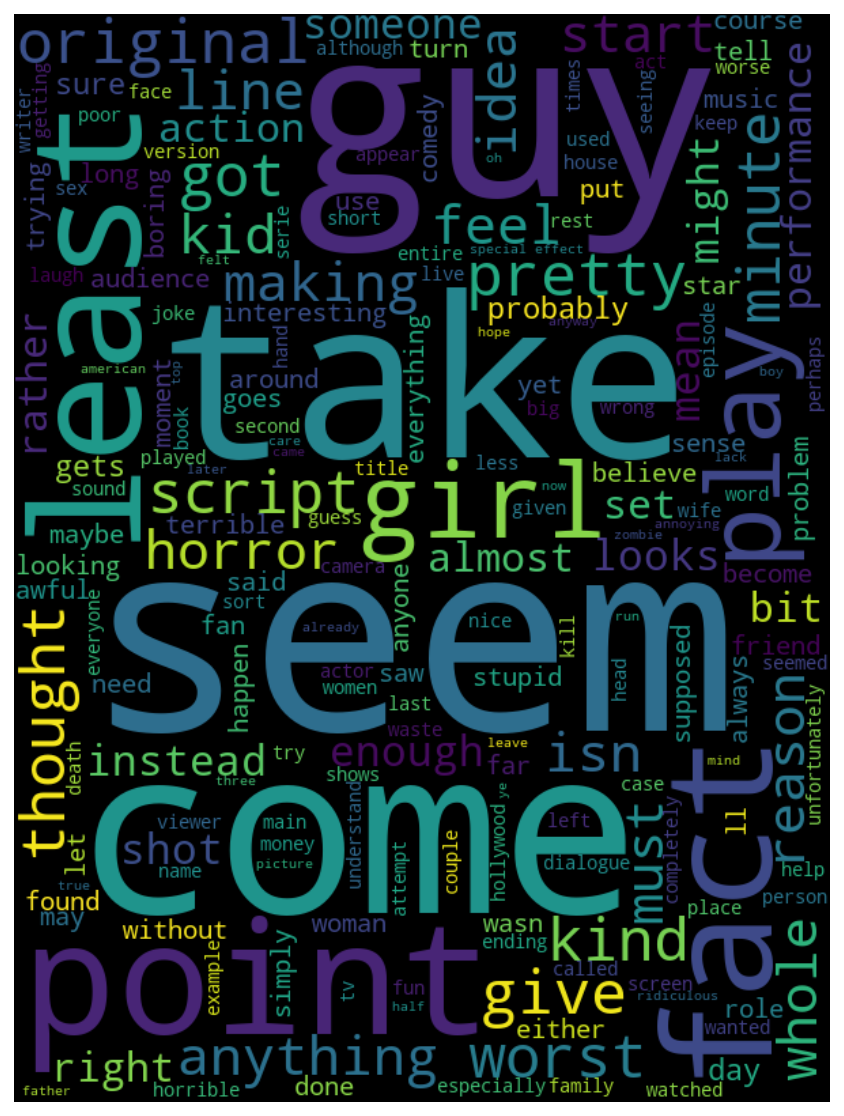

In [6]:
#  the size and colour of each word indicates its frequency or importance
#  using python library wordcloud
#  negative terms
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from wordcloud import WordCloud, STOPWORDS


neg_tweets = train[train.Sentiment == 0]
neg_string = []
for t in neg_tweets.SentimentText:
    neg_string.append(t)
#     concats devided sentences with spaces between them-->we have a big string of all of the sentences at the end 
neg_string = pd.Series(neg_string).str.cat(sep=' ')
# from wordcloud import WordCloud

wordcloud = WordCloud(width=600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

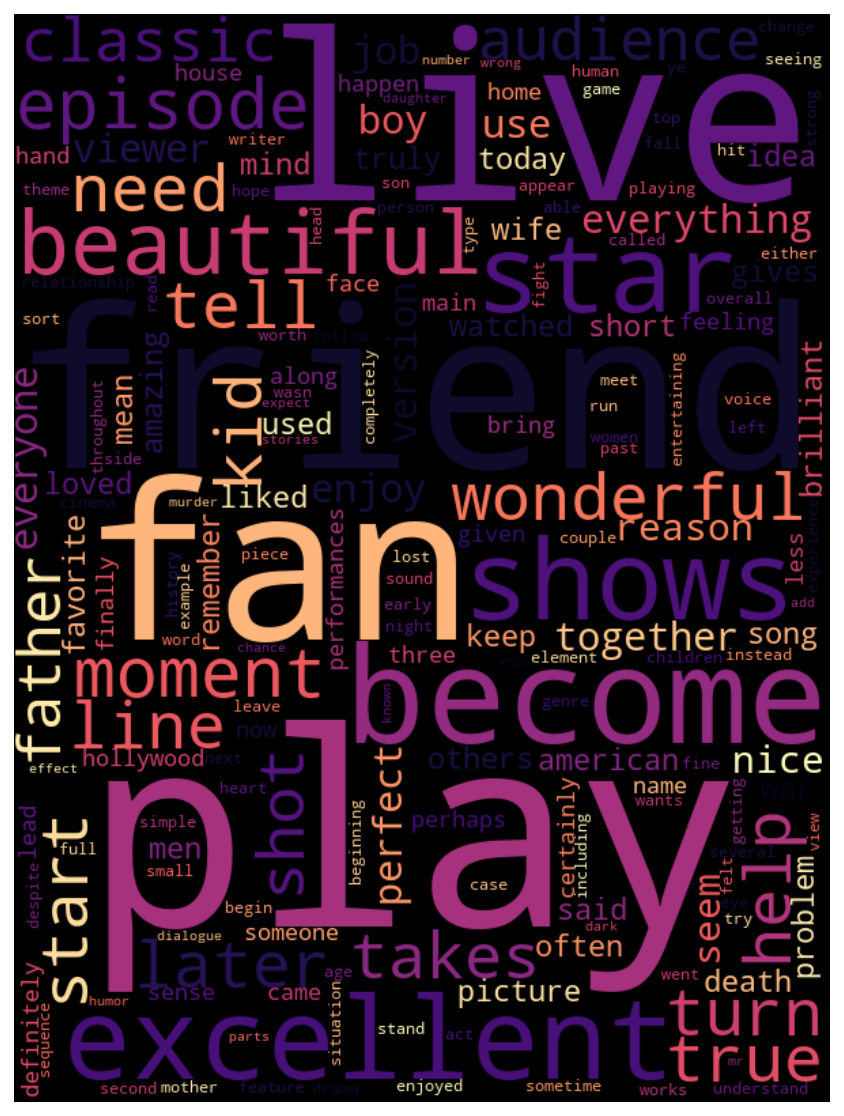

In [15]:
pos_tweets = train[train.Sentiment == 1]
pos_string = []
for t in pos_tweets.SentimentText:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')
wordcloud = WordCloud(width=600, height=800,max_font_size=200,colormap='magma').generate(pos_string) 
plt.figure(figsize=(12,10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.show()

In [12]:
# reports validation accuracy
def Results(pipeline, x_train, y_train, x_test, y_test):
#     making a pipeline with the first set of data and predicting the second sets sentiments with the pipeline
    fitted = pipeline.fit(x_train, y_train)
    y_pred = fitted.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [23]:

names = ["Logistic Regression",
         "Ridge Classifier"]
classifiers = [
    LogisticRegression(),
    RidgeClassifier()
    ]
zipped = zip(names,classifiers)

tfidf = TfidfVectorizer()

def classifiers(vectorizer=tfidf, n_features=10000, stop_words=None, ngram_range=(1, 1), classifier=zipped):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print ("---------------------------------------------")
        print ("Validation result for {}".format(n))
        print (c)
        clf_acc= Results(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,clf_acc))
    return result
#monogram_result = classifiers(n_features=100000)
#bigram_result = classifiers(n_features=100000,ngram_range=(1,2))
threegram_result = classifiers(n_features=100000,ngram_range=(1,3))
#fourgram_result = classifiers(n_features=100000,ngram_range=(1,4))

---------------------------------------------
Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Users\10\Miniconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy score: 87.62%
---------------------------------------------
Validation result for Ridge Classifier
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)
accuracy score: 88.25%


In [24]:
#we test our own inputs
tfidf.set_params(stop_words=None, max_features=10000, ngram_range=(1, 1))
rc = RidgeClassifier()
p = Pipeline([
    ('tvec', tvec),
    ('rc', rc)
])
fitted = p.fit(x_train, y_train)
test = ["this movie is awesome", 
        "this movie was moving!",
        "i thaought it would be good but it disappointed me",
        "even though i was happy for his loss, i couldn't help but feeling guilty",
        "The film is the final nail in the coffin for the X-Men series"]
y_pred = fitted.predict(test)
print(y_pred)


[1 1 0 0 1]
